<a href="https://colab.research.google.com/github/jayeshpaluru/STAT4355Final/blob/main/STAT_4355_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.formula.api import ols
from statsmodels.miscmodels.ordinal_model import OrderedModel
from mord import LogisticAT
import scipy.stats as stats

In [127]:
# Load the data
wine = pd.read_csv("winequality-white.csv", sep = ";")

# Data exploration
print(wine.describe())
print(wine.isnull().sum())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

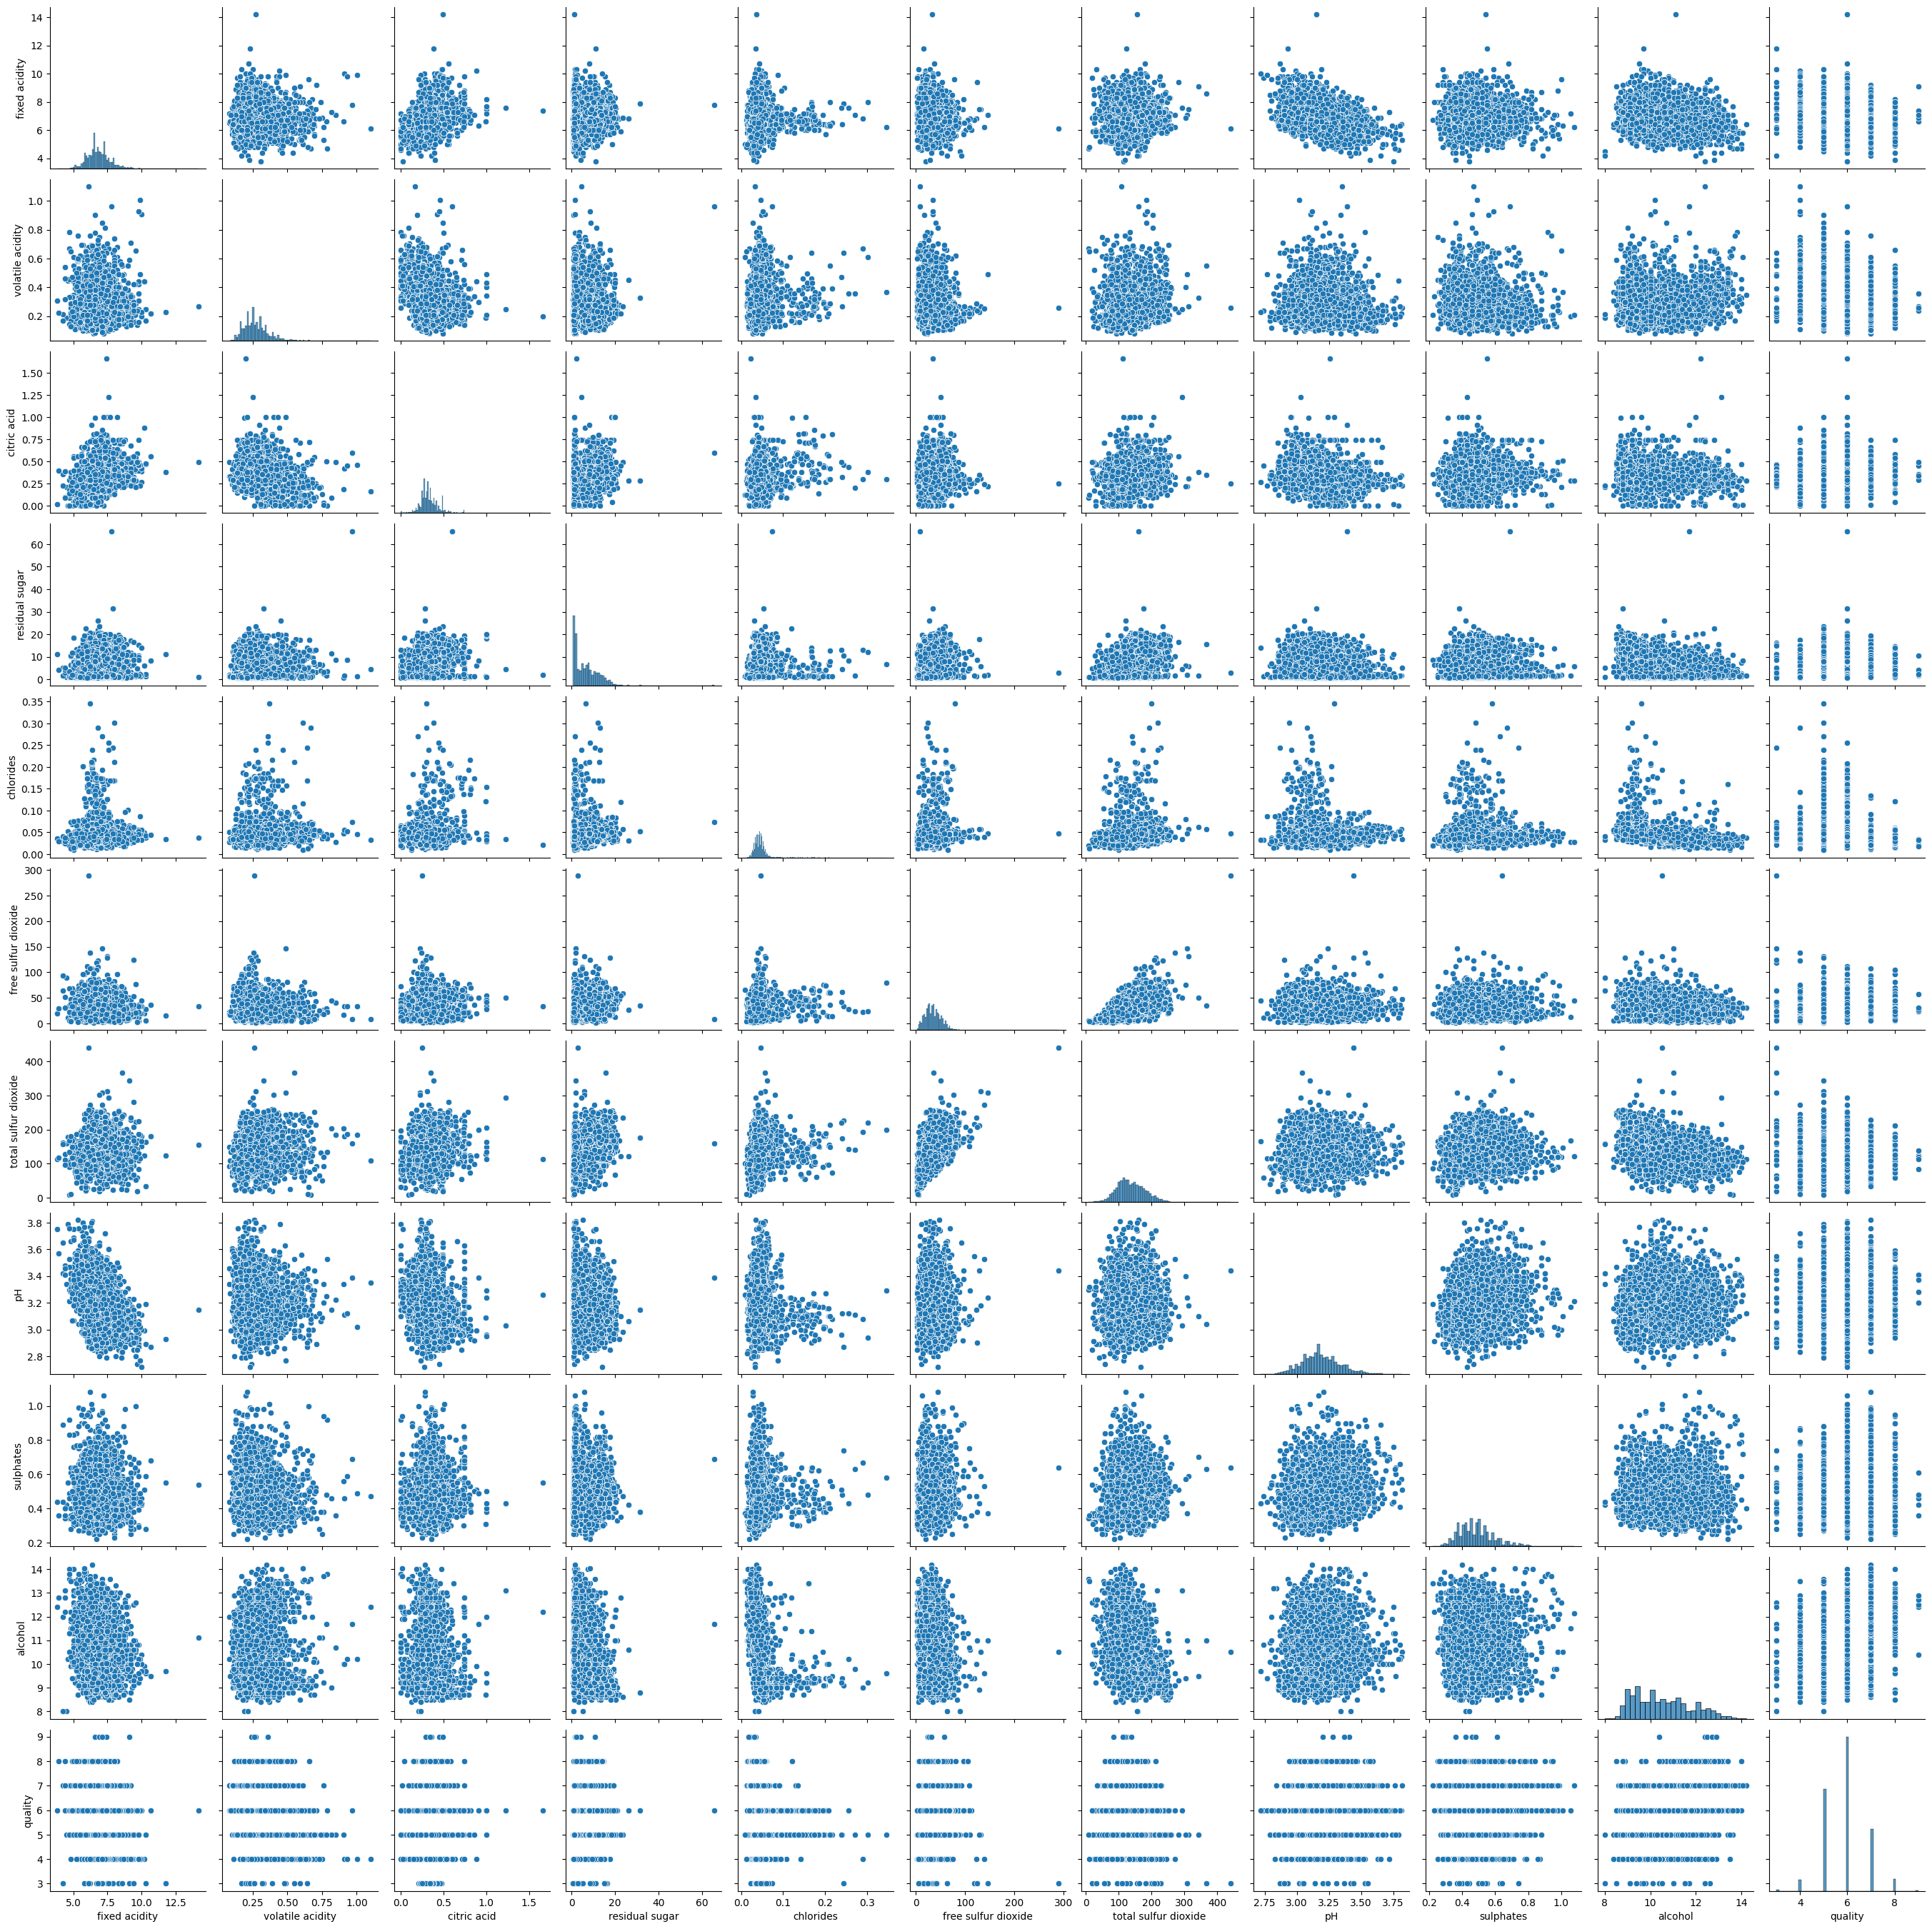

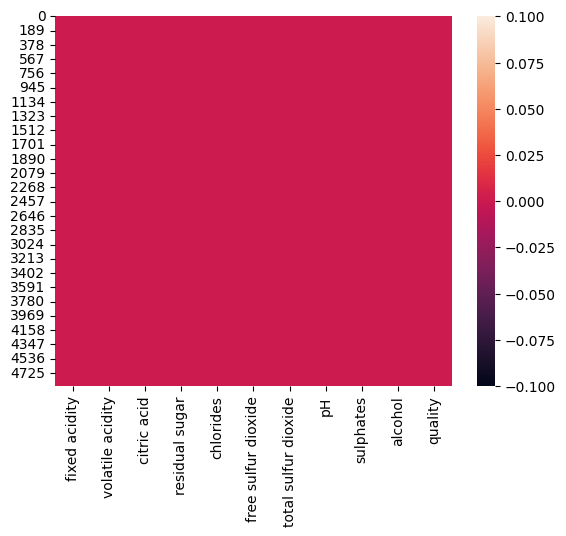

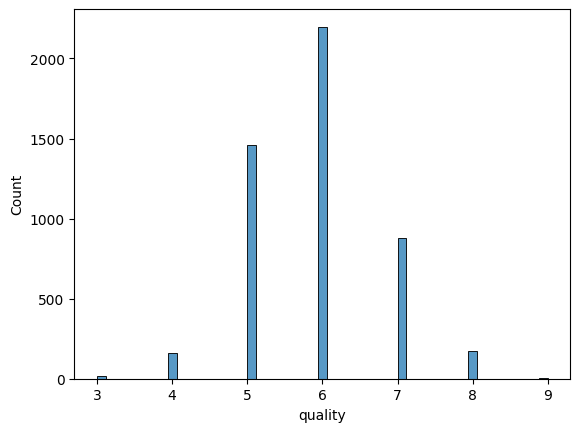

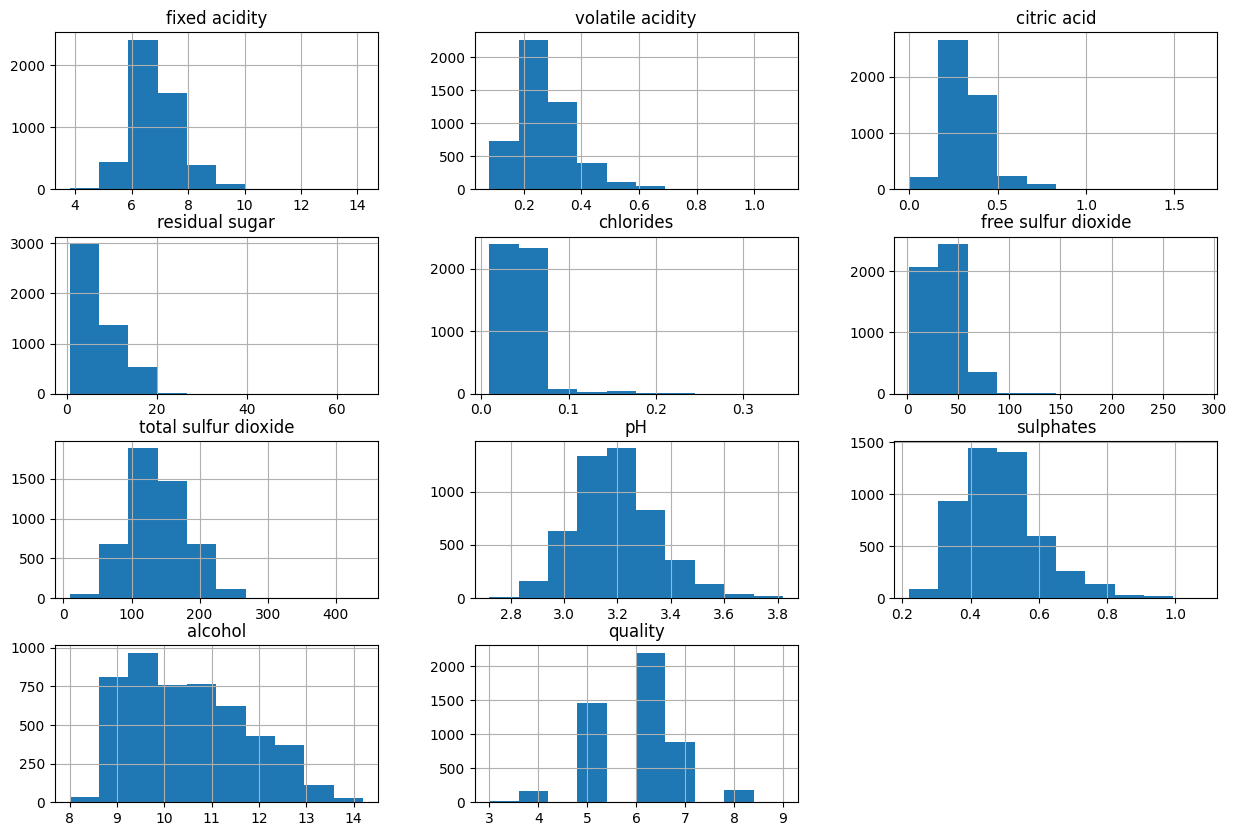

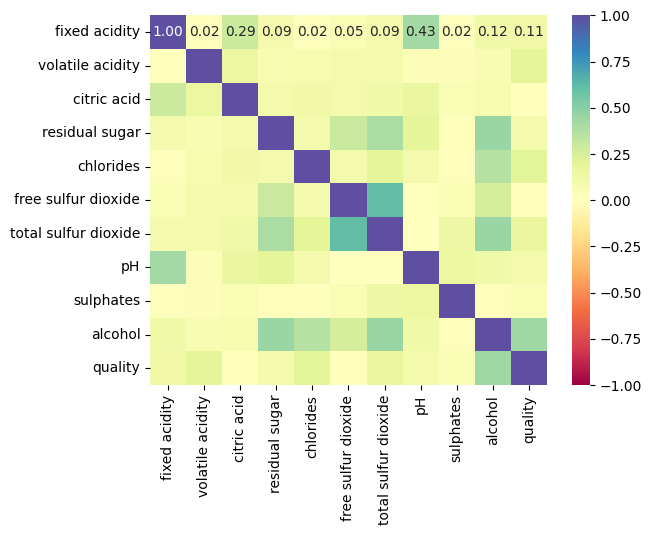

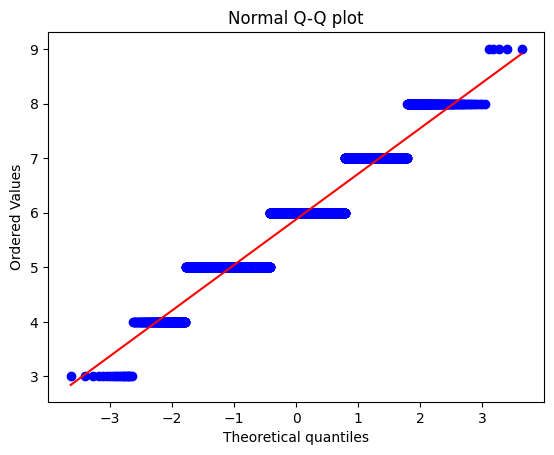

In [133]:
# Data visualization
sns.pairplot(wine)
plt.show()

sns.heatmap(wine.isnull())
plt.show()

sns.histplot(wine.quality)
plt.show()

wine.hist(figsize= (15,10))
plt.show()

sns.heatmap(wine.corr().abs(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# QQ Plot
stats.probplot(wine['quality'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [129]:
# Data preprocessing
highly_corr_cols = ['density']
wine = wine.drop(highly_corr_cols, axis = 1)

scaler = MinMaxScaler()
X = wine.drop('quality', axis = 1)
X_norm = scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm, columns=X.columns)

In [130]:
# Model building
Y = wine['quality']  # Target variable

In [136]:
# Poisson Regression
X_with_const = sm.add_constant(X)
poisson_model = sm.GLM(Y, X_with_const, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                quality   No. Observations:                 4898
Model:                            GLM   Df Residuals:                     4887
Model Family:                 Poisson   Df Model:                           10
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9120.2
Date:                Wed, 29 Nov 2023   Deviance:                       477.91
Time:                        19:59:29   Pearson chi2:                     474.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03582
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1216 

In [137]:
# Ordinal Regression
mod_log = OrderedModel(Y, X, distr='logit')  # Use X without constant
res_log = mod_log.fit(method='bfgs', disp=False)
print(res_log.summary())

ValueError: There should not be a constant in the model

In [138]:
# Ordinary Least Squares (OLS) Regression
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     183.3
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:59:55   Log-Likelihood:                -5574.7
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4887   BIC:                         1.124e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.0636 

In [ ]:
# Predictions
predicted = res_log.model.predict(res_log.params, exog=X)
predicted_rounded = np.round(predicted)